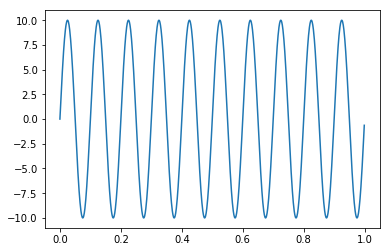

In [1]:
'''# make sample data

t = np.arange(0, 1, 1/sampling_freq)
f = 10
x = 10 * np.sin(2 * np.pi * f * t)

plt.plot(t, x)

# np.fft

transformed = np.abs(np.fft.fft(x))**2
transformed = np.around(transformed, 3)
freqs = np.fft.fftfreq(transformed.size, 1/sampling_freq)
# reordering so that the plot makes sense
switch = int(np.ceil(sampling_freq/2))
freqs = np.concatenate((freqs[switch:], freqs[:switch]))
transformed = np.concatenate((transformed[switch:], transformed[:switch]))
plt.plot(freqs, transformed)
# max of FFT = (amplitude * sampling frequency/2)^2

# now 2D data

x2 = np.sin(2 * np.pi * (3 * f) * t)
y2 = np.cos(2 * np.pi * f * t)
plt.plot(x2, y2)

positions = np.vstack((x2, y2))
transformed_positions = np.abs(np.fft.fft2(positions))**2
freqs_zero = np.fft.fftfreq(transformed_positions[0].size, 1/sampling_freq) 
freqs_one = np.fft.fftfreq(transformed_positions[1].size, 1/sampling_freq)

plt.plot(freqs_zero, transformed_positions[0])
plt.plot(freqs_one, transformed_positions[1])'''

In [58]:
# now vibe 2D data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sampling_freq = 1000
t = np.arange(0, 1, 1/sampling_freq)
f = 10

dx = np.zeros(t.size)
dy = np.zeros(t.size)
i = 0

N_vibrations = 4

vib_freqs    = np.random.uniform(low=10.0, high=500.0, size=N_vibrations)  # Hz
vib_amps     = np.random.uniform(low=0.1, high=1, size=N_vibrations) # milliarcseconds
vib_phase    = np.random.uniform(low=0.0, high=2*np.pi, size=N_vibrations)  # radians
vib_phase = np.zeros(N_vibrations)
vib_pa       = np.random.uniform(low=0.0, high=2*np.pi, size=N_vibrations)  # radians

for time in np.arange(0, t.size/sampling_freq, 1/sampling_freq):
    dx[i] = sum([-vib_amps[j] * np.sin(vib_pa[j]) * np.sin(vib_freqs[j] * time - vib_phase[j]) for j in range(N_vibrations)])
    dy[i] = sum([vib_amps[j] * np.cos(vib_pa[j]) * np.sin(vib_freqs[j] * time - vib_phase[j]) for j in range(N_vibrations)])
    i += 1

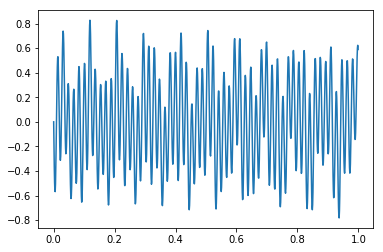

In [59]:
plt.plot(t, dx)

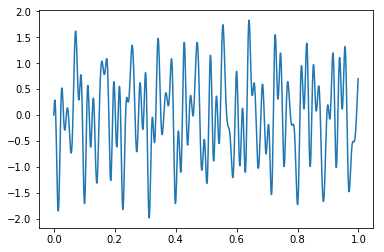

In [60]:
plt.plot(t, dy)

[  0.        3.90625   7.8125   11.71875  15.625    19.53125  23.4375
  27.34375  31.25     35.15625  39.0625   42.96875  46.875    50.78125
  54.6875   58.59375  62.5      66.40625  70.3125   74.21875  78.125
  82.03125  85.9375   89.84375  93.75     97.65625 101.5625  105.46875
 109.375   113.28125 117.1875  121.09375 125.      128.90625 132.8125
 136.71875 140.625   144.53125 148.4375  152.34375 156.25    160.15625
 164.0625  167.96875 171.875   175.78125 179.6875  183.59375 187.5
 191.40625 195.3125  199.21875 203.125   207.03125 210.9375  214.84375
 218.75    222.65625 226.5625  230.46875 234.375   238.28125 242.1875
 246.09375 250.      253.90625 257.8125  261.71875 265.625   269.53125
 273.4375  277.34375 281.25    285.15625 289.0625  292.96875 296.875
 300.78125 304.6875  308.59375 312.5     316.40625 320.3125  324.21875
 328.125   332.03125 335.9375  339.84375 343.75    347.65625 351.5625
 355.46875 359.375   363.28125 367.1875  371.09375 375.      378.90625
 382.8125  386.718

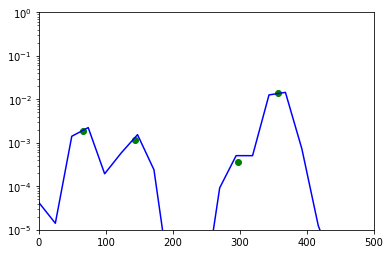

In [133]:
from scipy import signal

freqs_x, dx_psd = signal.welch(dx, sampling_freq) #or signal.periodogram
print(freqs_x)
freqs_x = freqs_x * 2 * np.pi
plt.ylim(1e-5, 1)
plt.xlim(0, 500)
plt.semilogy(freqs_x, dx_psd, color='b')
plt.scatter(vib_freqs, (vib_amps * np.sin(vib_pa))**2/16, color='g')

[3, 6, 12, 15]
Found 4 peaks
[ 183.3591811    25.33162378 1476.07790998    3.4773885 ]


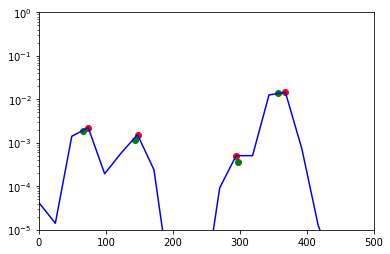

In [129]:
ind = signal.find_peaks(dx_psd)[0].tolist()
print(ind)
print("Found " + str(len(ind)) + " peaks")
plt.scatter(freqs_x[ind], dx_psd[ind], color='r')
m = max(vib_amps * np.sin(vib_phase))
plt.scatter(vib_freqs, vib_amps * np.sin(vib_phase))
plt.semilogy(freqs_x, dx_psd, color='b')
plt.ylim(1e-5, 1)
plt.xlim(0, 500)
plt.scatter(vib_freqs, (vib_amps * np.sin(vib_pa))**2 / 16, color='g') # magic number idk why this matches at all

print((vib_amps * np.sin(vib_pa))**2 * sampling_freq / (dx_psd[ind] * freqs_x[ind]))

[  0.        3.90625   7.8125   11.71875  15.625    19.53125  23.4375
  27.34375  31.25     35.15625  39.0625   42.96875  46.875    50.78125
  54.6875   58.59375  62.5      66.40625  70.3125   74.21875  78.125
  82.03125  85.9375   89.84375  93.75     97.65625 101.5625  105.46875
 109.375   113.28125 117.1875  121.09375 125.      128.90625 132.8125
 136.71875 140.625   144.53125 148.4375  152.34375 156.25    160.15625
 164.0625  167.96875 171.875   175.78125 179.6875  183.59375 187.5
 191.40625 195.3125  199.21875 203.125   207.03125 210.9375  214.84375
 218.75    222.65625 226.5625  230.46875 234.375   238.28125 242.1875
 246.09375 250.      253.90625 257.8125  261.71875 265.625   269.53125
 273.4375  277.34375 281.25    285.15625 289.0625  292.96875 296.875
 300.78125 304.6875  308.59375 312.5     316.40625 320.3125  324.21875
 328.125   332.03125 335.9375  339.84375 343.75    347.65625 351.5625
 355.46875 359.375   363.28125 367.1875  371.09375 375.      378.90625
 382.8125  386.718

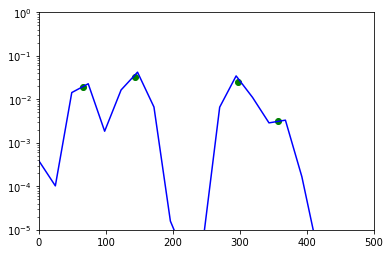

In [132]:
# now try the same thing in dy

freqs_y, dy_psd = signal.welch(dy, sampling_freq) #or signal.periodogram
print(freqs_y)
freqs_y = freqs_y * 2 * np.pi
plt.ylim(1e-5, 1)
plt.xlim(0, 500)
plt.semilogy(freqs_y, dy_psd, color='b')
plt.scatter(vib_freqs, (vib_amps * np.cos(vib_pa))**2/16, color='g')

[3, 6, 12, 15]
Found 4 peaks


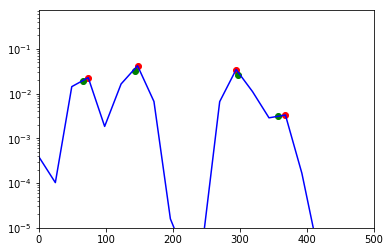

In [136]:
ind = signal.find_peaks(dy_psd)[0].tolist()
print(ind)
print("Found " + str(len(ind)) + " peaks")
plt.scatter(freqs_y[ind], dy_psd[ind], color='r')
m = max(vib_amps * np.cos(vib_phase))
plt.semilogy(freqs_y, dy_psd, color='b')
plt.ylim(1e-5, m)
plt.xlim(0, 500)
plt.scatter(vib_freqs, (vib_amps * np.cos(vib_pa))**2 / 16, color='g') # magic number idk why this matches at all

In [117]:
# so the plan is: run this in system-ID mode for half a second or so, then make the better Kalman filter.
# Why did it take a whole day to essentially call one scipy function. Why.

In [85]:
vibes = np.vstack((dx, dy))
psd = np.abs(np.fft.fft2(vibes))**2

def switch_and_plot(freqs, data):
    switch = int(np.ceil(sampling_freq/2))
    freqs = np.concatenate((freqs[switch:], freqs[:switch]))
    data = np.concatenate((data[switch:], data[:switch]))
    plt.plot(freqs, data)

# problems with this

## Nyquist

We're sampling at 1000 Hz, which means by the Nyquist sampling theorem we can't possibly recover the frequencies greater than 500 Hz.

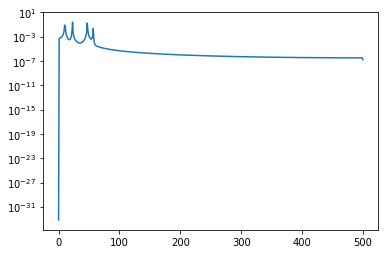

In [116]:
freqs_y, dy_psd = signal.periodogram(dy, sampling_freq)
plt.semilogy(freqs_y, dy_psd)

Text(0,0.5,'PSD [V**2/Hz]')

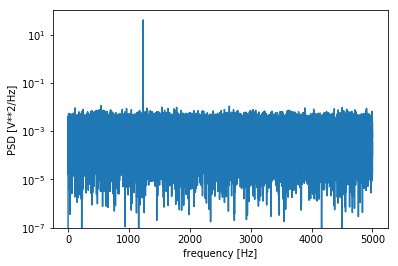

In [49]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

Text(0,0.5,'Linear spectrum [V RMS]')

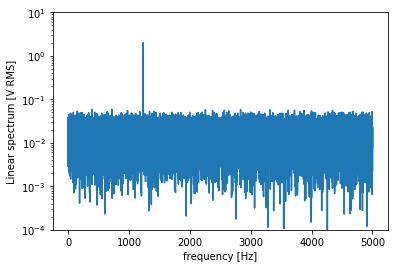

In [50]:
f, Pxx_spec = signal.periodogram(x, fs, 'flattop', scaling='spectrum')
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')

In [51]:
np.sqrt(Pxx_spec.max())

1.9941991340655587